LEVEL 1 (BASIC)

TASK 1 : DATA COLLECTION | WEBSCRAPPING

In [ ]:
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

Books.toScrap 

This is a Open Source for beginners interested in Webscrapping, this is a demo website for web scraping purposes, Prices and ratings here were randomly assigned and have no real meaning, It holds 40+ Genre category books and almost 1000 product of books !

In [ ]:
url = "https://books.toscrape.com/catalogue/page-1.html"
headers = {"User-Agent": "Mozilla/5.0"} # To mask identity
res = requests.get(url, headers=headers) 
soup = BeautifulSoup(res.text, "lxml")
book_list = [] # To store Dataset

Retrive HTML/Page Text info convert to Python

In [ ]:
books = soup.select(".product_pod") 
for book in books:
    title = book.h3.a["title"]
    price = book.select_one(".price_color").text.replace("£", "").replace("Â", "").strip()
    stock = book.select_one(".availability").text.strip()
    rating = book.p["class"][1]
    book_list.append({
        "Title": title,
        "Price": float(price),
        "Stock": stock,
        "Rating": rating })
book_df = pd.DataFrame(book_list)
book_df # Final Dataset

,Title,Price,Stock,Rating
0,A Light in the Attic,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five
5,The Requiem Red,22.65,In stock,One
6,The Dirty Little Secrets of Getting Your Dream...,33.34,In stock,Four
7,The Coming Woman: A Novel Based on the Life of...,17.93,In stock,Three
8,The Boys in the Boat: Nine Americans and Their...,22.60,In stock,Four
9,The Black Maria,52.15,In stock,One


TASK 2 : DATA CLEANING AND PREPROCESSING

DATA SUMMARY

In [24]:
book_df.describe()

,Price
count,20.000000
mean,38.048500
std,15.135231
min,13.990000
25%,22.637500
50%,41.380000
75%,51.865000
max,57.250000


DATA INFORMATION

In [25]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   20 non-null     object 
 1   Price   20 non-null     float64
 2   Stock   20 non-null     object 
 3   Rating  20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 772.0+ bytes


REMOVING DUPLICATES

In [78]:
print("No Duplicates Found !" if book_df.shape[0] == book_df.drop_duplicates().shape[0] else book_df.drop_duplicates())

No Duplicates Found !


CHECKING MISSING VALUES IF ANY

In [30]:
book_df.isna().sum()

Title     0
Price     0
Stock     0
Rating    0
dtype: int64

CATEGORICAL TO NUMERICAL CONVERSION

In [11]:
df = pd.DataFrame(book_df) # Duplicate dataseet
df["InStock"] = df["Stock"].apply(lambda x: 1 if "In stock" in x else 0) # Binary Conversion
df.head(5)

,Title,Price,Stock,Rating,InStock
0,A Light in the Attic,51.77,In stock,Three,1
1,Tipping the Velvet,53.74,In stock,One,1
2,Soumission,50.10,In stock,One,1
3,Sharp Objects,47.82,In stock,Four,1
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,1


In [12]:
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5} 
df["RatingScore"] = df["Rating"].map(rating_map) # Text to Numerical 
df.head(5)

,Title,Price,Stock,Rating,InStock,RatingScore
0,A Light in the Attic,51.77,In stock,Three,1,3
1,Tipping the Velvet,53.74,In stock,One,1,1
2,Soumission,50.10,In stock,One,1,1
3,Sharp Objects,47.82,In stock,Four,1,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,1,5


ONEHOT-LABEL ENCODING CATEGORICAL VARIABLES

In [13]:
le = LabelEncoder(); df["Stock_Label"] = le.fit_transform(df["Stock"])
df_onehot = pd.get_dummies(df["Rating"], prefix="Rate")
df = pd.concat([df, df_onehot], axis=1)
df.head(5)

,Title,Price,Stock,Rating,InStock,RatingScore,Stock_Label,Rate_Five,Rate_Four,Rate_One,Rate_Three,Rate_Two
0,A Light in the Attic,51.77,In stock,Three,1,3,0,False,False,False,True,False
1,Tipping the Velvet,53.74,In stock,One,1,1,0,False,False,True,False,False
2,Soumission,50.10,In stock,One,1,1,0,False,False,True,False,False
3,Sharp Objects,47.82,In stock,Four,1,4,0,False,True,False,False,False
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,1,5,0,True,False,False,False,False


NORMALIZE AND STANDARDIZE NUMERICAL COLUMNS

In [14]:
scaler_norm = MinMaxScaler(); scaler_std = StandardScaler()
df["Price_Norm"] = scaler_norm.fit_transform(df[["Price"]])
df["Price_Std"] = scaler_std.fit_transform(df[["Price"]])
df.head(5)

,Title,Price,Stock,Rating,InStock,RatingScore,Stock_Label,Rate_Five,Rate_Four,Rate_One,Rate_Three,Rate_Two,Price_Norm,Price_Std
0,A Light in the Attic,51.77,In stock,Three,1,3,0,False,False,False,True,False,0.873324,0.930145
1,Tipping the Velvet,53.74,In stock,One,1,1,0,False,False,True,False,False,0.918863,1.063686
2,Soumission,50.10,In stock,One,1,1,0,False,False,True,False,False,0.834720,0.816940
3,Sharp Objects,47.82,In stock,Four,1,4,0,False,True,False,False,False,0.782016,0.662385
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,1,5,0,True,False,False,False,False,0.930190,1.096902


FEATURE SELECTION

In [ ]:
selected_cols = [ "Title", "Price", "InStock", "RatingScore", "Stock_Label", "Price_Norm", "Price_Std" ] 
selected_cols = selected_cols + list(df_onehot.columns)
df.head(5)

,Title,Price,Stock,Rating,InStock,RatingScore,Stock_Label,Rate_Five,Rate_Four,Rate_One,Rate_Three,Rate_Two,Price_Norm,Price_Std
0,A Light in the Attic,51.77,In stock,Three,1,3,0,False,False,False,True,False,0.873324,0.930145
1,Tipping the Velvet,53.74,In stock,One,1,1,0,False,False,True,False,False,0.918863,1.063686
2,Soumission,50.10,In stock,One,1,1,0,False,False,True,False,False,0.834720,0.816940
3,Sharp Objects,47.82,In stock,Four,1,4,0,False,True,False,False,False,0.782016,0.662385
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,1,5,0,True,False,False,False,False,0.930190,1.096902


FINAL DATASET

In [18]:
cleaned_df = df.copy()
cleaned_df

,Title,Price,Stock,Rating,InStock,RatingScore,Stock_Label,Rate_Five,Rate_Four,Rate_One,Rate_Three,Rate_Two,Price_Norm,Price_Std
0,A Light in the Attic,51.77,In stock,Three,1,3,0,False,False,False,True,False,0.873324,0.930145
1,Tipping the Velvet,53.74,In stock,One,1,1,0,False,False,True,False,False,0.918863,1.063686
2,Soumission,50.10,In stock,One,1,1,0,False,False,True,False,False,0.834720,0.816940
3,Sharp Objects,47.82,In stock,Four,1,4,0,False,True,False,False,False,0.782016,0.662385
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five,1,5,0,True,False,False,False,False,0.930190,1.096902
5,The Requiem Red,22.65,In stock,One,1,1,0,False,False,True,False,False,0.200185,-1.043825
6,The Dirty Little Secrets of Getting Your Dream...,33.34,In stock,Four,1,4,0,False,True,False,False,False,0.447295,-0.319177
7,The Coming Woman: A Novel Based on the Life of...,17.93,In stock,Three,1,3,0,False,False,False,True,False,0.091077,-1.363781
8,The Boys in the Boat: Nine Americans and Their...,22.60,In stock,Four,1,4,0,False,True,False,False,False,0.199029,-1.047214
9,The Black Maria,52.15,In stock,One,1,1,0,False,False,True,False,False,0.882108,0.955904


TASK 3 : EXPLORATORY DATA ANALYSIS | EDA

STATISTICAL SUMMARY

In [19]:
cleaned_df.describe()

,Price,InStock,RatingScore,Stock_Label,Price_Norm,Price_Std
count,20.000000,20.0,20.000000,20.0,20.000000,2.000000e+01
mean,38.048500,1.0,2.850000,0.0,0.556137,-2.331468e-16
std,15.135231,0.0,1.565248,0.0,0.349867,1.025978e+00
min,13.990000,1.0,1.000000,0.0,0.000000,-1.630864e+00
25%,22.637500,1.0,1.000000,0.0,0.199896,-1.044672e+00
50%,41.380000,1.0,3.000000,0.0,0.633148,2.258338e-01
75%,51.865000,1.0,4.000000,0.0,0.875520,9.365850e-01
max,57.250000,1.0,5.000000,0.0,1.000000,1.301620e+00


STRUCTURE OF THE DATASET

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        20 non-null     object 
 1   Price        20 non-null     float64
 2   Stock        20 non-null     object 
 3   Rating       20 non-null     object 
 4   InStock      20 non-null     int64  
 5   RatingScore  20 non-null     int64  
 6   Stock_Label  20 non-null     int64  
 7   Rate_Five    20 non-null     bool   
 8   Rate_Four    20 non-null     bool   
 9   Rate_One     20 non-null     bool   
 10  Rate_Three   20 non-null     bool   
 11  Rate_Two     20 non-null     bool   
 12  Price_Norm   20 non-null     float64
 13  Price_Std    20 non-null     float64
dtypes: bool(5), float64(3), int64(3), object(3)
memory usage: 1.6+ KB


CHART DECORATIONS

In [26]:
df = cleaned_df.copy()
sns.set(style="whitegrid")
plt.rcParams['axes.facecolor'] = '#f7f7f7'

1. Boxplots (Outlier Detection)

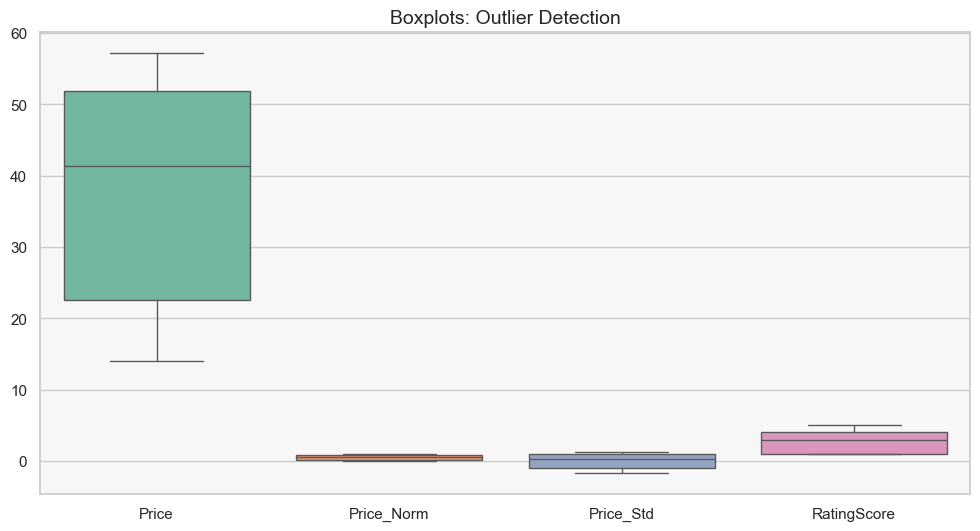

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Price", "Price_Norm", "Price_Std", "RatingScore"]], palette="Set2")
plt.title("Boxplots: Outlier Detection", fontsize=14)
plt.show();

2. Correlation Heatmap

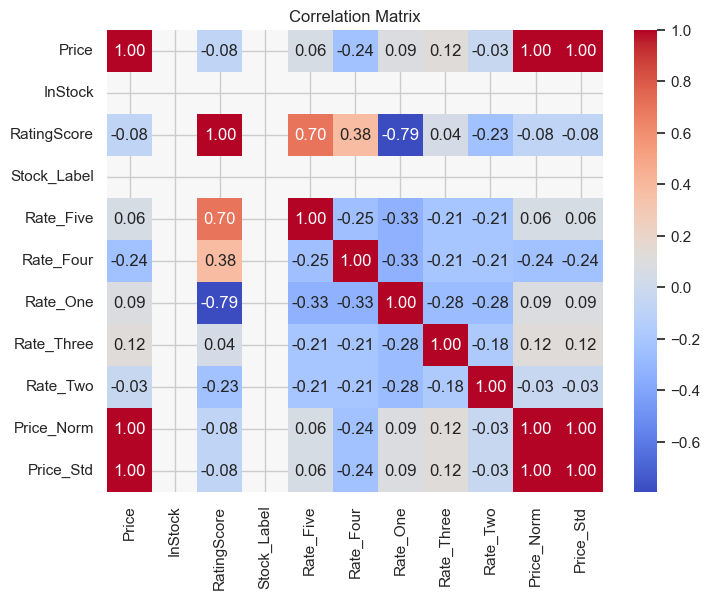

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show();

3. Horizontal Bar – Avg Price per Rating

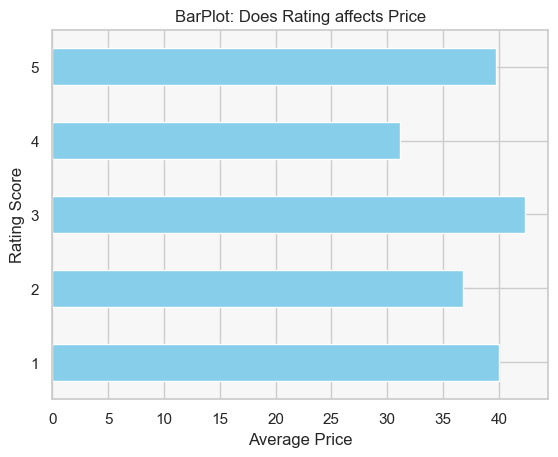

In [54]:
df.groupby("RatingScore")["Price"].mean().sort_index().plot(kind="barh", color="skyblue")
plt.title("BarPlot: Does Rating affects Price")
plt.xlabel("Average Price")
plt.ylabel("Rating Score")
plt.show()

4. Line Plot – Price vs Index


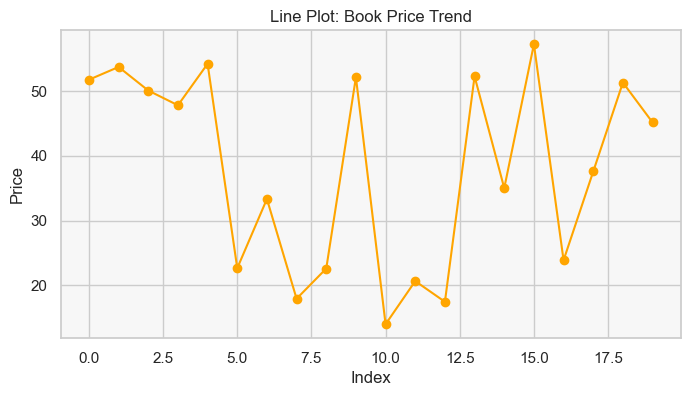

In [47]:
plt.figure(figsize=(8, 4))
plt.plot(df.index, df["Price"], marker="o", color="orange")
plt.title("Line Plot: Book Price Trend")
plt.xlabel("Index")
plt.ylabel("Price")
plt.grid(True)
plt.show();

5. Pie Chart – Rating Distribution


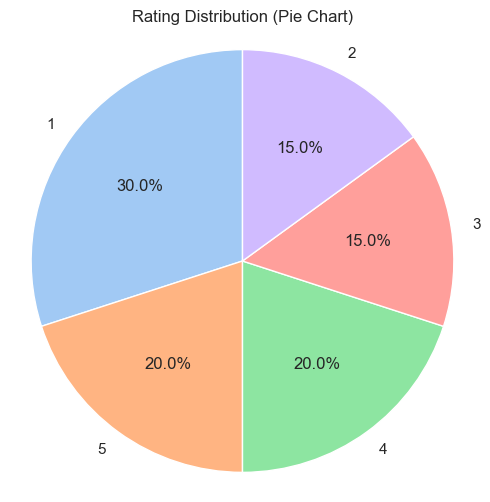

In [49]:

rating_counts = df["RatingScore"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Rating Distribution (Pie Chart)")
plt.axis('equal')
plt.show();

6. KDE – Price Distribution


C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_18160\4208957001.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Price"], shade=True, color="purple")


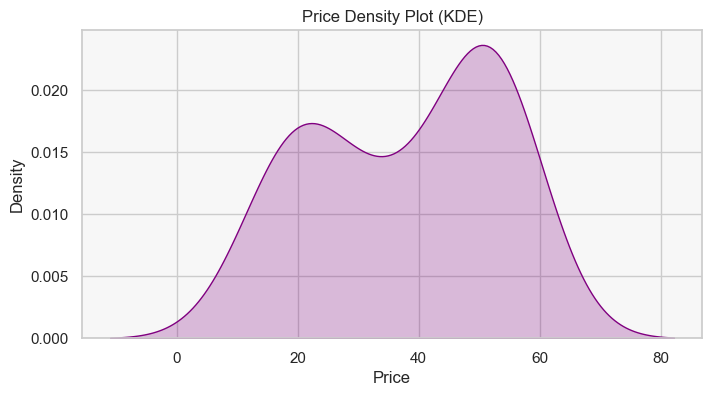

In [57]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df["Price"], shade=True, color="purple")
plt.title("Price Density Plot (KDE)")
plt.xlabel("Price")
plt.show();

7. Donut Chart – Stock Availability

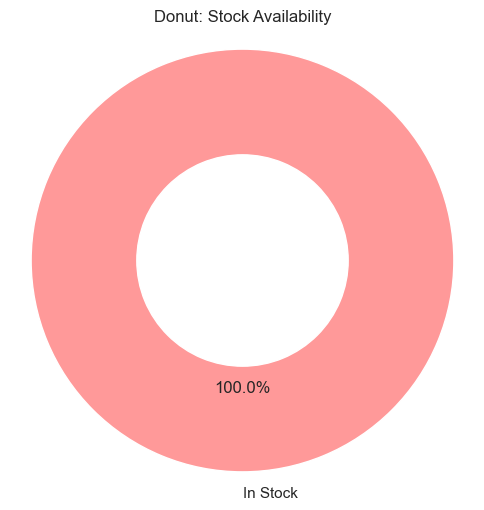

In [61]:
stock_counts = df["InStock"].value_counts()
colors = ["#ff9999", "#66b3ff"]
plt.figure(figsize=(6, 6))
plt.pie(stock_counts, labels=["In Stock"], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.5})
plt.title("Donut: Stock Availability")
plt.axis('equal')
plt.show()

8. 3D Scatter – Price, Rating, InStock

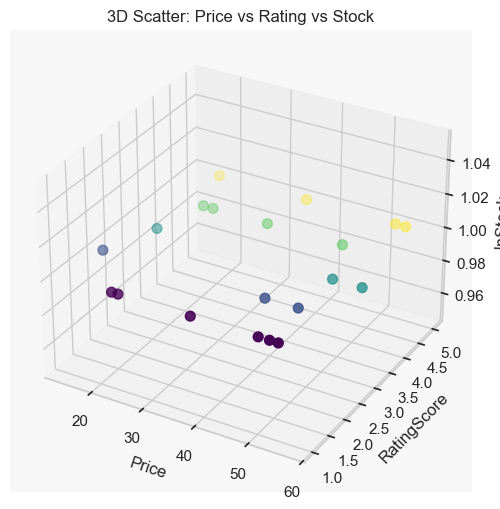

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Price"], df["RatingScore"], df["InStock"], c=df["RatingScore"], cmap="viridis", s=50)
ax.set_xlabel("Price")
ax.set_ylabel("RatingScore")
ax.set_zlabel("InStock")
plt.title("3D Scatter: Price vs Rating vs Stock")
plt.show()

9. Bubble Plot – Price vs Rating by Stock

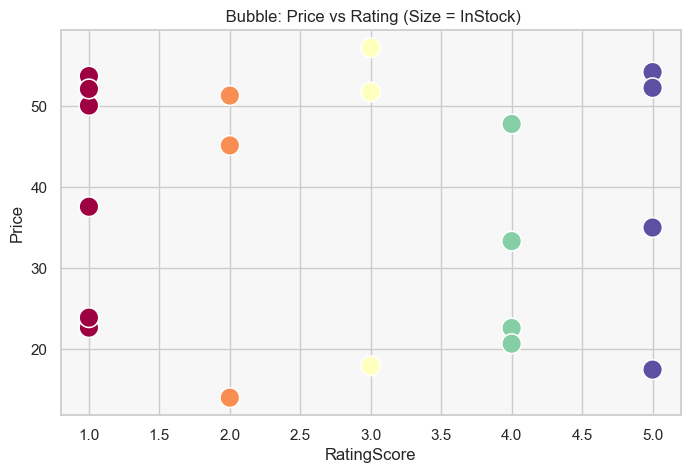

In [73]:
plt.figure(figsize=(8, 5))
sizes = df["Price"] * 10
sns.scatterplot(data=df, x="RatingScore", y="Price", size="InStock", hue="RatingScore", palette="Spectral", sizes=(200, 20), legend=False)
plt.title(" Bubble: Price vs Rating (Size = InStock)")
plt.show();

10. Vertical Bar – Book Count by Rating

C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_18160\3916294458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RatingScore", data=df, palette="cubehelix")


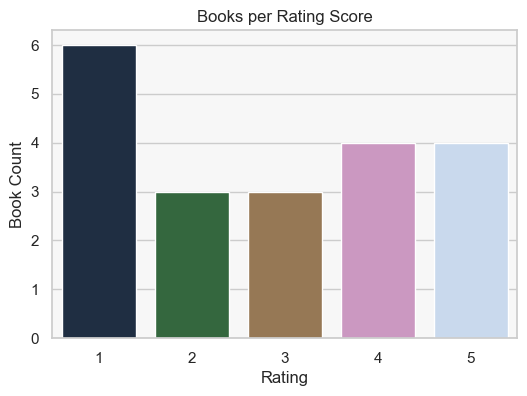

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(x="RatingScore", data=df, palette="cubehelix")
plt.title("Books per Rating Score")
plt.xlabel("Rating")
plt.ylabel("Book Count")
plt.show()

INSIGHTS

-> No outliler or Duplicate values exists

-> Columns highly Correlated to each other

-> Price between 40 to 60 more likely attracts

-> Rating doesn't affects the Price

-> All the books are "in stocks"